In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 

# Load Datasets
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup (Datetime & 'job_skills' to list type)

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
# Converts column to list type - Allows for .explode()
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list) 

In [2]:
# Replace entire dataframe with only Data Analyst job postings

df = df[df['job_title_short'] == 'Data Analyst']

In [15]:
# Explode out the skills column
df_exploded = df.explode('job_skills')

# We use .agg bc we have multiple aggregation functions
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'), # 1st aggregation (count)
    median_salary = ('salary_year_avg', 'median') # 2nd aggregation (median)
)

skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

skill_stats.sort_values(by='skill_count', ascending=False).head(10).reset_index()

# skill_stats


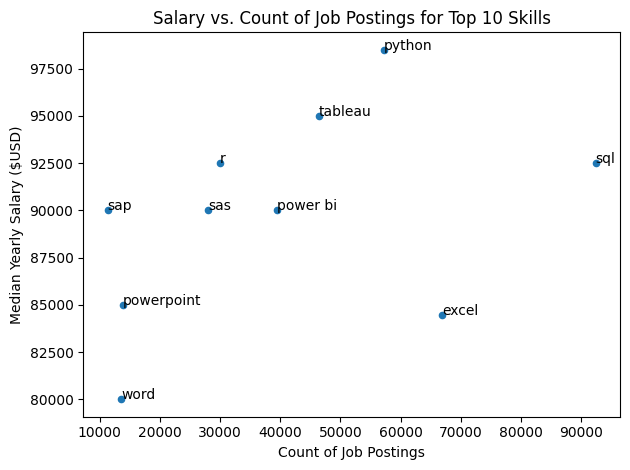

In [24]:
skill_stats.plot(kind='scatter', x = 'skill_count', y = 'median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()


for i, txt in enumerate(skill_stats.index): # .index will get the index of the skill_stats df (basically a list of the job skills)
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

# for i, skill in enumerate(skill_stats.index):
#     plt.annotate(skill, (skill_stats['skill_count'][i], skill_stats['median_salary'][i]))

plt.show()